In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the training/testing dataset from csv files
training_dataset = pd.read_csv("../output_train.csv", header=0, usecols=[*range(1,23)], sep=";")
testing_dataset = pd.read_csv("../output_test.csv", header=0, usecols=[*range(1,23)], sep=";")

# Remove missing values
training_dataset.dropna(axis = 0, inplace = True)
testing_dataset.dropna(axis = 0, inplace = True)

print("The shape of the training dataset: " + str(training_dataset.shape))
print("The shape of the testing dataset: " + str(testing_dataset.shape))

training_dataset.head()

# Set of features in the dataset
features = list(testing_dataset.columns)
print(features[:-1])

# Convert the expected output into arrays, e.g., 1 -> [1, 0, 0]
output_training = []
for i, val in enumerate(training_dataset.iloc[:,21]):
    temp = [0, 0, 0]
    temp[val - 1] = 1
    output_training.append(temp)

output_testing = []
for i, val in enumerate(testing_dataset.iloc[:,21]):
    temp = [0, 0, 0]
    temp[val - 1] = 1
    output_testing.append(temp)

# Remove the expected output column from the datasets
prep_training_dataset = training_dataset.drop(columns=['output'])
prep_testing_dataset = testing_dataset.drop(columns=['output'])

# Preprocessing the data
scaler = StandardScaler()
scaler.fit(prep_training_dataset)

# Apply transform to both the training/testing dataset.
X_train = scaler.transform(prep_training_dataset)
Y_train = np.array(output_training)

X_test = scaler.transform(prep_testing_dataset)
Y_test = np.array(output_testing)

print("Preprocessed inputs of the training dataset: " + str(X_train))
print("Preprocessed outputs of the training dataset: " + str(Y_train))

The shape of the training dataset: (279, 22)
The shape of the testing dataset: (103, 22)
['session_time', '%tcp_protocol', '%udp_protocol', 'ul_data_volume', 'max_ul_volume', 'min_ul_volume', 'avg_ul_volume', 'std_ul_volume', '%ul_volume', 'dl_data_volume', 'max_dl_volume', 'min_dl_volume', 'avg_dl_volume', 'std_dl_volume', '%dl_volume', 'nb_uplink_packet', 'nb_downlink_packet', 'ul_packet', 'dl_packet', 'kB/s', 'nb_packet/s']
Preprocessed inputs of the training dataset: [[ 1.24949172  0.59231316 -0.58844871 ...  0.54501086  0.2208743
   0.62843195]
 [-0.8505485   0.59231316 -0.58844871 ...  0.4955518   0.97523057
   1.92817113]
 [ 0.43816388  0.5886868  -0.58480418 ...  0.04242978  0.0580633
   0.48885055]
 ...
 [-1.2056687   0.34743347 -0.34234218 ... -0.71477922 -0.56070378
  -0.41047599]
 [-0.89460259  0.58409106 -0.58018542 ...  0.10394211  0.44768975
   1.24034932]
 [-0.98176026  0.59231316 -0.58844871 ... -0.62260254  0.43111073
  -0.53651579]]
Preprocessed outputs of the traini

Text(0, 0.5, 'SSE')

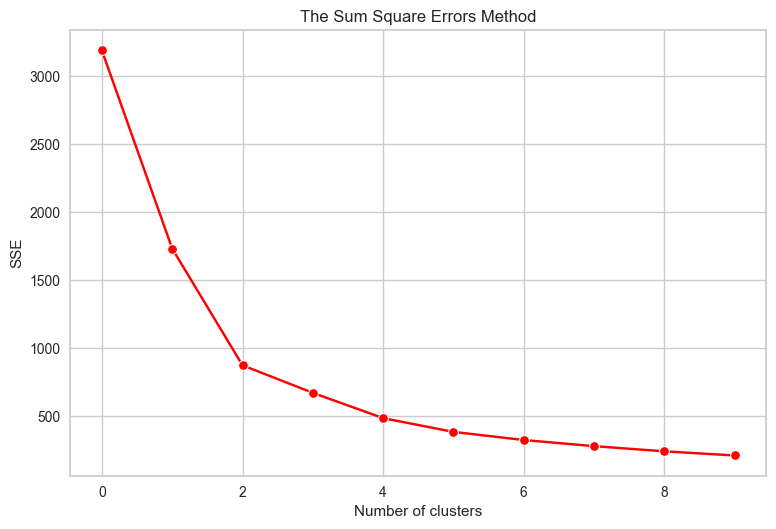

In [60]:
# Using the Sum Squared Errors method to find the optimal number of clusters
from sklearn.cluster import KMeans
import seaborn as sns

sum_squared_errors = []
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit_predict(X_train)
    sum_squared_errors.append(kmeans.inertia_)

sns.lineplot(sum_squared_errors, marker='o', color='red')

plt.title('The Sum Square Errors Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

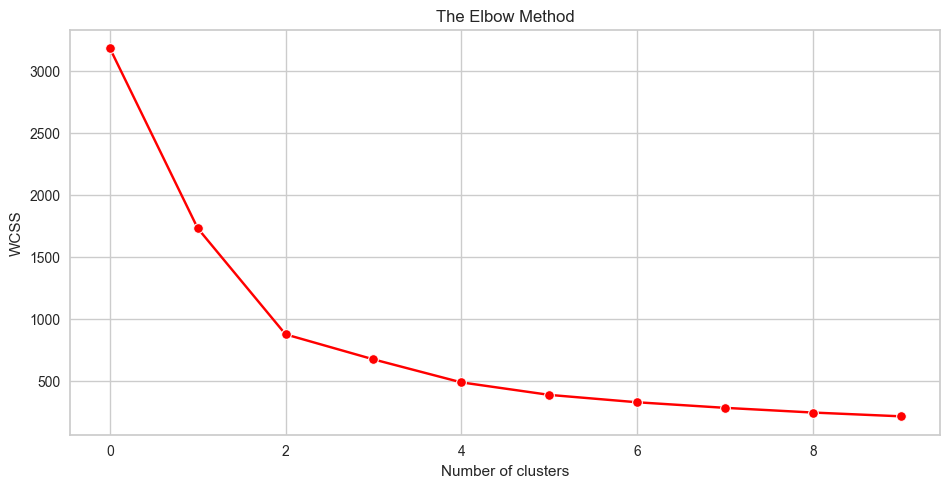

In [61]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Centers found by scikit-learn: 
[[-0.51335926 -1.69321056]
 [ 3.86550245  1.26983582]
 [-2.51031323  2.0991824 ]]


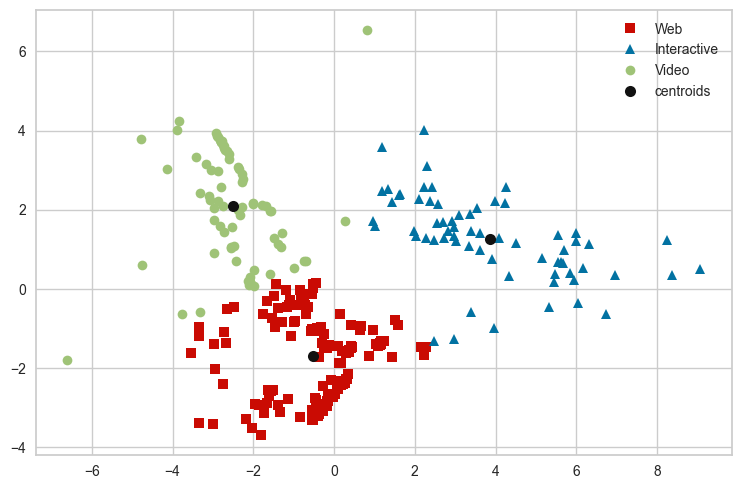

In [64]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

n_clusters = 3
k_means = KMeans(n_clusters=n_clusters)
model = k_means.fit(X_train)

centroids = k_means.cluster_centers_
labels = k_means.labels_

print('Centers found by scikit-learn: \n' + str(centroids))

plt.figure()
plt.plot(X_train[labels==0,0],X_train[labels==0,1],'rs', label='Web')
plt.plot(X_train[labels==1,0],X_train[labels==1,1],'b^', label='Interactive')
plt.plot(X_train[labels==2,0],X_train[labels==2,1],'go', label='Video')

plt.plot(centroids[:,0],centroids[:,1],'ko',markersize=8, label='centroids')

plt.legend(loc='best')
plt.show()

Elbow Method to determine the number of clusters to be formed:


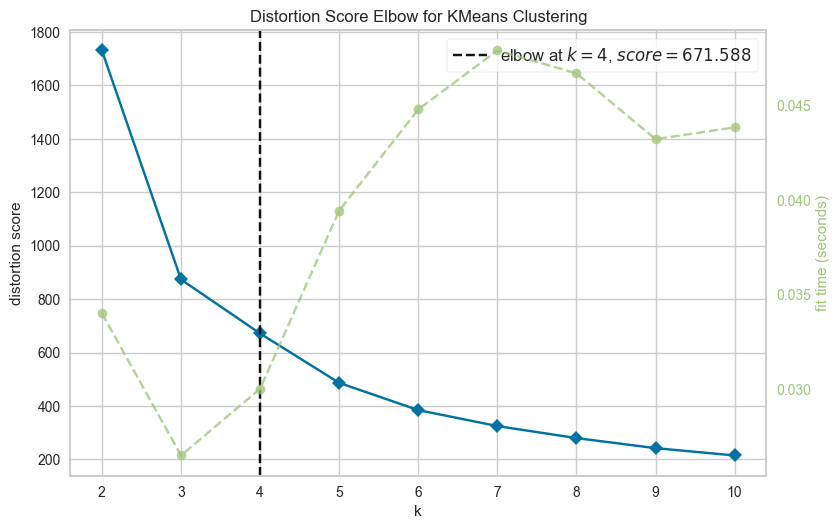

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#Initiating PCA to reduce dimensions aka features to 2
pca = PCA(n_components=2)
pca.fit(X_train)
PCA_ds = pd.DataFrame(pca.transform(X_train), columns=(["col1","col2"]))
PCA_ds.describe().T

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [67]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
Y_pred = kmeans.predict(X_train)

centers = kmeans.cluster_centers_
label = []
nb_row =0

# Bad results ???
print('\nBegin testing:')
for row in X_test:
    a = [(row[0],row[1])]
    min_dist = cdist(a,[(centers[0][0], centers[0][1])], 'euclidean')
    min_index = 0
    for i in range(1,len(centers)):
        b = [(centers[i][0], centers[i][1])]
        if cdist(a,b,'euclidean') < min_dist:
            min_dist = cdist(a,b,'euclidean')
            min_index = i

    print('%s (expected %s)' % (min_index, Y_test[nb_row].tolist()))
    nb_row+=1


Begin testing:
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
2 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
2 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
2 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
1 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0, 0])
2 (expected [1, 0,

Text(0.5, 1.0, 'Confusion Matrix')

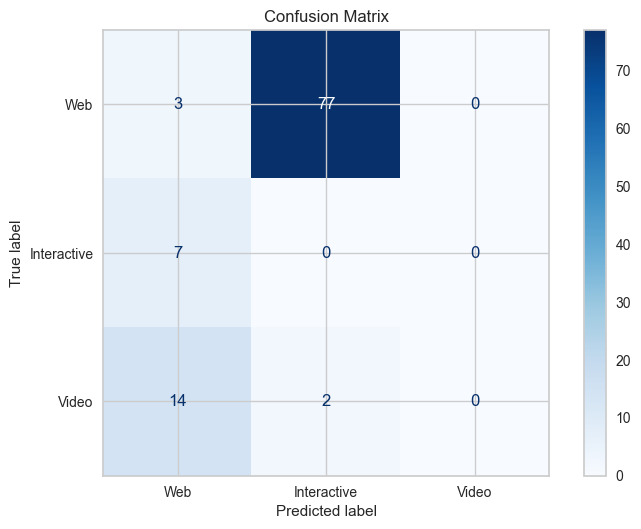

In [100]:
# Compute confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
Y_pred = kmeans.predict(X_test)
Y_expected = [(i - 1) for i in testing_dataset.iloc[:,21].tolist()]
cm = confusion_matrix(Y_expected, Y_pred)

# Plot confusion matrix -> make any sense ???
labels = ["Web", "Interactive", "Video"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")